# **Modulo 1. Construcción de un modelo estadistico Base**

## Código del primer entregable "pre procesamiento de datos":

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Mi unidad/IA/Estadistica/data_sets/Automobile.csv")
#The categorical data groups the information into distinct fields
categorical = df[['symboling','make','fuel-type','aspiration','number-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders',	'fuel-system']]
#This data dont present any order
nominal = categorical[['make','fuel-type','aspiration','number-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']]
#The data of symboling represents the degree to which the auto is more risky than its price indicates.
ordinal = categorical[['symboling']]
#The numeric data is the one that is not contained in the categorical df.
numeric = df.loc[:, ~df.columns.isin(categorical.columns)]
#This type of data can take a big number of values 
continuous = numeric[['normalized-losses', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price','wheel-base', 'city-mpg', 'highway-mpg']]
#Inconsistent data
#The first think that we can see is that there are not null values at the begining, 
#but the reason for that is because some values represent the nulls with a ?
nulls = df.isnull().any()
columnas_con_nulos = nulls[nulls].index.tolist()
print("Columnas con valores nulos:", columnas_con_nulos)
#Firstly we change that character to a numpy null.
df.replace("?", np.nan, inplace=True)
print('After transformation:\n')
nulls = df.isnull().any()
columnas_con_nulos = nulls[nulls].index.tolist()
print("Columnas con valores nulos:", columnas_con_nulos)
#Nulls
#Here we can see those columns that have null values, and the number 
#of them compare to the total amount of vals.
nulls = df.columns[df.isnull().any()]
columna_nulls=[]
for columna in nulls:
    nulos = df[columna].isnull().sum()
    total_datos = len(df.index)
    print(f"Columna: {columna}")
    columna_nulls.append(columna)
    print(f"Cantidad de nulos: {nulos}")
    print(f"Total de datos: {total_datos}")
    print("-" * 20)
#The next thing to check is if in our dataset are duplicates
duplicates = df[df.duplicated()]

print("Registros duplicados:")
print(duplicates)


#Outliers using box plots
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecta outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Imprime la cantidad de outliers por columna
print("Cantidad de outliers por columna:")
print(outliers)

#Wrong data format
#In the case of this two variables
#They should be integers instead of strings
nominal[['number-of-doors','num-of-cylinders']]

categorical = df[['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type',	'fuel-system']]

categorical_encoded = pd.get_dummies(categorical)


# Ahora categorical_encoded contiene las columnas categóricas codificadas en formato one-hot
print(categorical_encoded.head())

df = df.drop(['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type',	'fuel-system'], axis=1)

df = pd.concat([df, categorical_encoded], axis=1)

#Wrong format
df['normalized-losses'] = df['normalized-losses'].astype('Int64')
df['horsepower']=df['horsepower'].astype('Int64')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['bore']=df['bore'].astype('Float64')
df['price']=df['price'].astype('Int64')
df['peak-rpm']=df['peak-rpm'].astype('Int64')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['stroke']=df['stroke'].astype('Float64')

mapping = {
    'one':1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['number-of-doors'] = df['number-of-doors'].replace(mapping)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(mapping)
df['number-of-doors'] = df['number-of-doors'].astype('Int64')
df['num-of-cylinders'] = df['num-of-cylinders'].astype('Int64')
df['symboling']=df['symboling'].astype('Int64')

media = df['normalized-losses'].mean()

# Rellenar los valores nulos con la media
df['normalized-losses'].fillna(media, inplace=True)

df_filtrado = df.dropna()

nulls = df_filtrado.columns[df_filtrado.isnull().any()]
columna_nulls=[]
for columna in nulls:
    nulos = df_filtrado[columna].isnull().sum()
    total_datos = len(df_filtrado.index)
    print(f"Columna: {columna}")
    columna_nulls.append(columna)
    print(f"Cantidad de nulos: {nulos}")
    print(f"Total de datos: {total_datos}")
    print("-" * 20)
print('Cantidad de datos originales: ',len(df.index),'\nCantidad de datos restantes: ',len(df_filtrado.index))

Columnas con valores nulos: []
After transformation:

Columnas con valores nulos: ['normalized-losses', 'number-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
Columna: normalized-losses
Cantidad de nulos: 41
Total de datos: 205
--------------------
Columna: number-of-doors
Cantidad de nulos: 2
Total de datos: 205
--------------------
Columna: bore
Cantidad de nulos: 4
Total de datos: 205
--------------------
Columna: stroke
Cantidad de nulos: 4
Total de datos: 205
--------------------
Columna: horsepower
Cantidad de nulos: 2
Total de datos: 205
--------------------
Columna: peak-rpm
Cantidad de nulos: 2
Total de datos: 205
--------------------
Columna: price
Cantidad de nulos: 4
Total de datos: 205
--------------------
Registros duplicados:
Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, number-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-s

C:\Users\rauli\AppData\Local\Temp\ipykernel_12904\2298447835.py:56: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).sum()


# 1.Construcción del modelo estadistico Base
Se construye un modelo base del cual partiremos para posteriormente realizar las modificaciones pertinentes en caso de ser necesarias. Eligire un modelo de arbol de clasificación ya que nuestra variable objetivo es la variable de "symboling" la cual representa la relacion de riesgo/precio y se le asigna un valor numerico segun la clase de riesgo que se presenta. Siendo un porblema de clasificación el arbol se adapta muy bien, ademas como primer modelo es perfecto ya que nos permitira visualizar que variables describen mas que otras a nuestra variable objetivo.

In [30]:
#Bibliotecas utilizadas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Extraccion de variables independientes y target
df_filtrado['symboling']=df_filtrado['symboling'].astype(int)
y= df_filtrado['symboling']
X = df_filtrado.drop('symboling',axis=1)

#División de los datos Entrenamiento/Pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Construcción del modelo básico
model = DecisionTreeClassifier(random_state=42)
#Entrenamiento
model.fit(X_train, y_train)
#Testing
y_pred = model.predict(X_test)

C:\Users\rauli\AppData\Local\Temp\ipykernel_12904\3732266304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['symboling']=df_filtrado['symboling'].astype(int)


# 2. Selección de metricas
En este caso al tener un problema de clasificación la metrica principal a utilizar es el accuracy, además de esto utilizare el reporte de clasificación, el nivel de ajuste del modelo y la matriz de confusión, con la finalidad de determinar cual fue el comportamiento de nuestro modelo con los datos.

In [31]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Umbrales para clasificar el nivel de ajuste
bias_threshold = 0.1  # Umbral para el sesgo (bias)
variance_threshold = 0.1  # Umbral para la varianza

# Calcula el sesgo (bias) y la varianza
bias = accuracy_score(y_train, model.predict(X_train)) - accuracy
variance = accuracy - accuracy_score(y_test, model.predict(X_test))

# Determina el nivel de ajuste del modelo
if bias < -bias_threshold and variance < -variance_threshold:
    model_fit = "Overfitting"  # Sobreajuste
elif bias > bias_threshold and variance > variance_threshold:
    model_fit = "Underfitting"  # Subajuste
else:
    model_fit = "Fitting"  # Ajuste adecuado

# Imprime las metrícas
print('*'*20)
print('Metricas:\n')
print("\tNivel de Accuracy del Modelo:", accuracy)
print("\tNivel de Ajuste del Modelo:", model_fit)
print("\tMatriz de Confusión del Modelo:\n", cm)
print("\tReporte de Clasificación del Modelo:\n", classification_report)

********************
Metricas:

	Nivel de Accuracy del Modelo: 0.717948717948718
	Nivel de Ajuste del Modelo: Fitting
	Matriz de Confusión del Modelo:
 [[ 1  0  0  0  0]
 [ 0 12  1  0  0]
 [ 0  2  9  1  0]
 [ 0  2  3  4  0]
 [ 0  0  2  0  2]]
	Reporte de Clasificación del Modelo:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           0       0.75      0.92      0.83        13
           1       0.60      0.75      0.67        12
           2       0.80      0.44      0.57         9
           3       1.00      0.50      0.67         4

    accuracy                           0.72        39
   macro avg       0.83      0.72      0.75        39
weighted avg       0.75      0.72      0.71        39



A partir de las métricas anteriores se puede observar que el modelo tien un buen comportamiento para predecir nuestra variable objetivo sin embargo no es el ideal, modificando los hiperparametros o haciendo una selección de las mejores features es posible que el modelo mejore; inclusive ingresando más datos de entrada ya que estamos trabajando con un volumen pequeño de datos.

# 3. Validacion de supuestos teoricos
## Independencia de los errores residuales

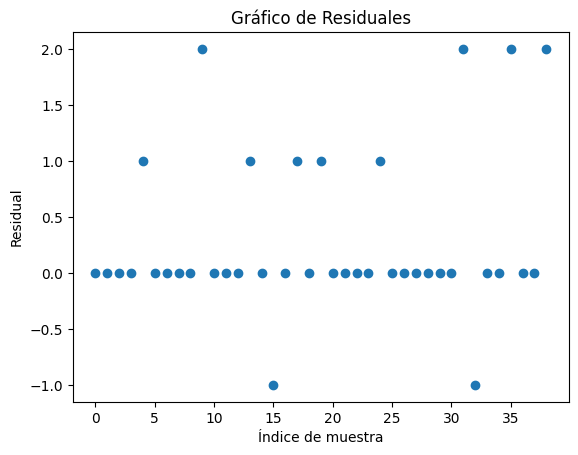

In [32]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
# Trazar los residuales para buscar patrones
plt.scatter(range(len(residuals)), residuals)
plt.xlabel("Índice de muestra")
plt.ylabel("Residual")
plt.title("Gráfico de Residuales")
plt.show()

Nuestro gráfico demuestra que la independencia se cumple en la mayoría de los casos, no es un gráfico ideal puesto que se observan ciertos patrones anormales lo que indica que el modelo no esta capturando completamente la relación entre las variables.

## Homocedasticidad

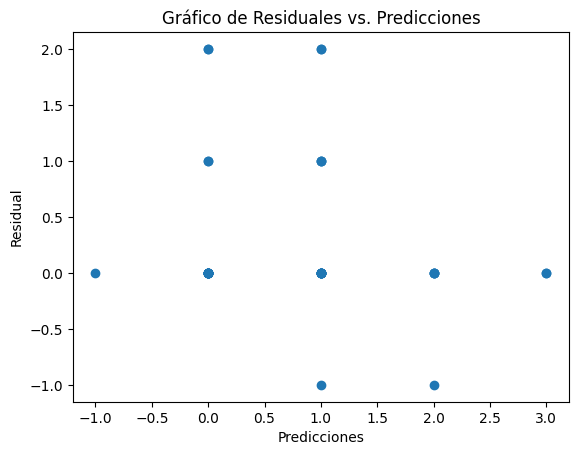

In [33]:
# Trazar residuales vs. predicciones
plt.scatter(y_pred, residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residual")
plt.title("Gráfico de Residuales vs. Predicciones")
plt.show()

El gráfico anterior refuerza nuestro supuesto de que el modelo esta logrando capturar la mayoría de las relaciones sin embargo no su totalidad, en este caso los patrones en los residuales indican que el modelo no está capturando adecuadamente la relación entre las variables y hay información sistemática no capturada, sin embargo no hay Heterocedasticidad ya que no se observa una agrupación en las predicciones.

## Normalidad de los Residuales

In [34]:
from scipy.stats import anderson

# Prueba de normalidad Anderson-Darling
result = anderson(residuals)
print("Estadística de Anderson-Darling:", result.statistic)
print("Valores críticos:", result.critical_values)


Estadística de Anderson-Darling: 6.373408983823701
Valores críticos: [0.53  0.604 0.725 0.845 1.005]


La estadística de Anderson-Darling es 6.373408983823701, es mayor que cualquier valor crítico en la lista de valores críticos [0.53, 0.604, 0.725, 0.845, 1.005]. Esto sugiere que los residuales no siguen una distribución normal a ningún nivel de significancia mencionado. Lo cual puede implicar diversas cosas tales como; Violación del supuesto de normalidad, Inferencia no confiable, Pérdida de precisión, entre otras.

## Correlación

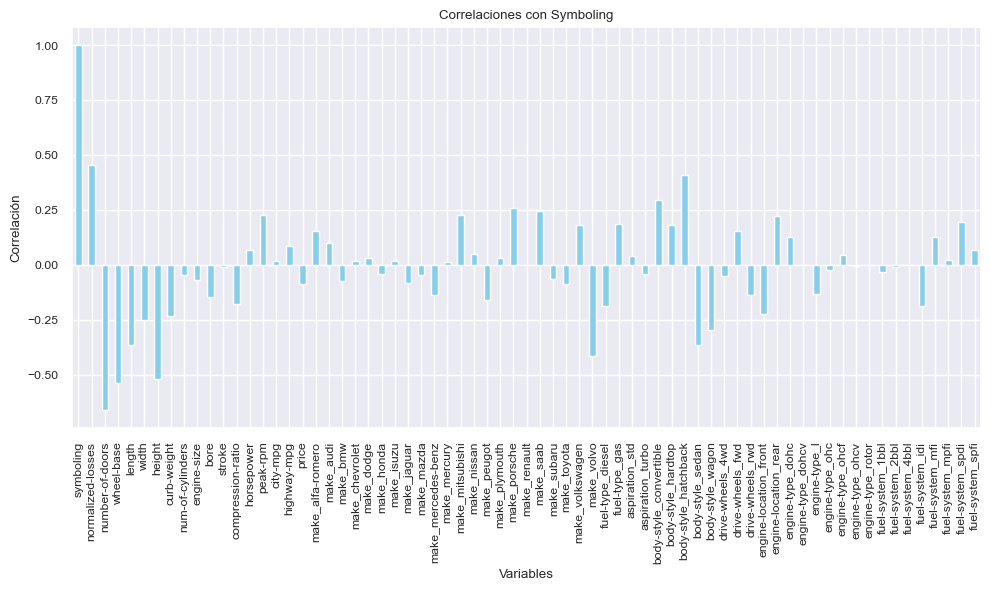

In [46]:
# Supongamos que tienes un DataFrame llamado 'df_filtrado' con tus datos

# 1. Calcular la matriz de correlación
correlation_matrix = df_filtrado.corr()

# 2. Filtrar la fila de correlaciones de 'symboling'
correlation_with_symboling = correlation_matrix['symboling']

# 3. Graficar las correlaciones
plt.figure(figsize=(10, 6))
correlation_with_symboling.plot(kind='bar', color='skyblue')
plt.title('Correlaciones con Symboling')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


El gráfrico de correlación contra nuestra variable objetivo indica que existen un gran numero de variables con nula relación con nuestro target; lo cual me parece muy interesante sobre todo en la sección de marcas de los vehiculos, ya que podemos obervar algunas marcas con nula relación con el riesgo de precio y otras con relaciones directamente o indirectamente proporcionales.
De igual forma, me resulta muy interesante que la variable de numero de puertas tenga una relación indirectamente proporcional con nuestra variable objetivo, ya que cuando una persona piensa en el riesgo del precio de un vehículo no se toma en cuenta el numero de puertas.

# 4.En caso aplique, usa inferencia estadística para seleccionar las variables relevantes.

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

# Variables independientes (características) y variable dependiente (objetivo)
X = df_filtrado.drop('symboling',axis=1)
y = df_filtrado['symboling']

# Realizar selección de características utilizando prueba F (ANOVA)
k_best = SelectKBest(score_func=f_regression, k=10)  # Seleccionar las 2 mejores características
X_new = k_best.fit_transform(X, y)

# Obtener índices de características seleccionadas
selected_indices = k_best.get_support(indices=True)

# Crear un DataFrame con las características seleccionadas
selected_features = X.iloc[:, selected_indices]

# Ajustar un modelo de regresión lineal con las características seleccionadas
model = LinearRegression()
model.fit(selected_features, y)

# Imprimir coeficientes de regresión para las características seleccionadas
print("Coeficientes de regresión para las características seleccionadas:")
for i, coef in enumerate(model.coef_):
    print(f"Variable{i + 1}: {coef}")

# Considera el contexto y la relevancia práctica para la selección final de variables


Coeficientes de regresión para las características seleccionadas:
Variable1: 0.009240934912419065
Variable2: -0.352866131012365
Variable3: -0.1320566287614151
Variable4: 0.042604238321884216
Variable5: 0.035086440395742165
Variable6: -1.0432648483461218
Variable7: 0.5332821633409859
Variable8: -0.1685145149318783
Variable9: -0.5874703171917053
Variable10: -0.7265334778625625


## Selección de variables significativas con un nivel de alhpa de 0.05

In [114]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# Variables independientes (características) y variable dependiente (objetivo)
X = df_filtrado.drop('symboling',axis=1)
y = df_filtrado['symboling']

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar un análisis de F-regression para calcular p-values
f_values, p_values = f_regression(X, y)

# Nivel de significancia (alfa)
alpha = 0.05

# Variables significativas (aquellas con valor p menor que alfa)
significant_variables = [var for var, p_value in zip(X.columns, p_values) if p_value < alpha]

# Mostrar las variables significativas
print("Total de variables:", len(df_filtrado.columns.tolist()))
print("Variables significativas:", len(significant_variables))


Total de variables: 69
Variables significativas: 29


## Reconstrucción del modelo con variables significativas:

In [115]:
#Bibliotecas utilizadas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Extraccion de variables independientes y target
df_filtrado['symboling']=df_filtrado['symboling'].astype(int)
y= df_filtrado['symboling']
x_prev = df_filtrado.drop('symboling',axis=1)

X= x_prev[significant_variables]

#División de los datos Entrenamiento/Pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Construcción del modelo básico
model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini',splitter='best',min_samples_split=5,max_leaf_nodes=20)
#Entrenamiento
model.fit(X_train, y_train)
#Testing
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Umbrales para clasificar el nivel de ajuste
bias_threshold = 0.1  # Umbral para el sesgo (bias)
variance_threshold = 0.1  # Umbral para la varianza

# Calcula el sesgo (bias) y la varianza
bias = accuracy_score(y_train, model.predict(X_train)) - accuracy
variance = accuracy - accuracy_score(y_test, model.predict(X_test))

# Determina el nivel de ajuste del modelo
if bias < -bias_threshold and variance < -variance_threshold:
    model_fit = "Overfitting"  # Sobreajuste
elif bias > bias_threshold and variance > variance_threshold:
    model_fit = "Underfitting"  # Subajuste
else:
    model_fit = "Fitting"  # Ajuste adecuado

# Imprime las metrícas
print('*'*20)
print('Metricas:\n')
print("\tNivel de Accuracy del Modelo:", accuracy)
print("\tNivel de Ajuste del Modelo:", model_fit)
print("\tMatriz de Confusión del Modelo:\n", cm)
print("\tReporte de Clasificación del Modelo:\n", classification_report)

********************
Metricas:

	Nivel de Accuracy del Modelo: 0.6153846153846154
	Nivel de Ajuste del Modelo: Fitting
	Matriz de Confusión del Modelo:
 [[1 0 0 0 0]
 [0 9 2 0 2]
 [2 1 7 1 1]
 [0 0 3 3 3]
 [0 0 0 0 4]]
	Reporte de Clasificación del Modelo:
               precision    recall  f1-score   support

          -1       0.33      1.00      0.50         1
           0       0.90      0.69      0.78        13
           1       0.58      0.58      0.58        12
           2       0.75      0.33      0.46         9
           3       0.40      1.00      0.57         4

    accuracy                           0.62        39
   macro avg       0.59      0.72      0.58        39
weighted avg       0.70      0.62      0.62        39



C:\Users\rauli\AppData\Local\Temp\ipykernel_12904\2834505317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['symboling']=df_filtrado['symboling'].astype(int)


# Conlcusión

Este modelo sirvió como punto de referencia y proporcionó resultados iniciales para el problema en cuestión. Sorprendentemente, este modelo inicial superó significativamente al segundo modelo en términos de rendimiento predictivo.

Para abordar esta diferencia en el rendimiento, se aplicaron técnicas de inferencia estadística en el segundo modelo. Se utilizó un nivel de significancia (alpha) de 0.05 para seleccionar las variables más relevantes que se utilizarían en el modelo. Esta selección de variables basada en la inferencia estadística tenía como objetivo eliminar posibles multicolinealidades y reducir la complejidad del modelo.

Sin embargo, a pesar del rigor estadístico en la selección de variables del segundo modelo, los resultados finales demostraron que el modelo inicial sin selección de variables superó al segundo modelo. Esto plantea preguntas interesantes sobre la relación entre la complejidad del modelo y su capacidad de predicción. A veces, una aproximación más simple puede resultar en un mejor rendimiento.

Este trabajo destaca la importancia de la evaluación y la comparación de diferentes enfoques de modelado. Aunque la inferencia estadística y la selección de variables son herramientas valiosas en el análisis de datos, es crucial no perder de vista el rendimiento predictivo final del modelo. En algunos casos, la simplicidad y la intuición pueden superar a la complejidad y la sofisticación. La elección de un enfoque de modelado debe basarse en un equilibrio entre la teoría estadística y los resultados prácticos.